## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# set plot design to seaborn default
sns.set()

## Download the dataset

In [3]:
url = 'https://opendata.muenchen.de/dataset/5e73a82b-7cfb-40cc-9b30-45fe5a3fa24e/resource/40094bd6-f82d-4979-949b-26c8dc00b9a7/download/220511_monatszahlenmonatszahlen2204_verkehrsunfaelle.csv'
df = pd.read_csv(url)
# work with only 2021 and earlier data as the challenge rules suggest
df = df[df.JAHR<2022]
# convert MONAT from object to datetime type to visualize properly
df['MONAT_DATETIME'] = pd.to_datetime(df[df.MONAT != 'Summe'].MONAT,format='%Y%m')

## Dataset description
The dataset consists of historical traffic accidents count in Munich, Germany from January, 2000 up to December, 2022. The accidents are categorized into three different categories: Traffic accidents, Hit-and-run accidents, Alcohol accidents. It also contains statistics (percentage, average) for the previous months and years.

In [4]:
df

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
12,Alkoholunfälle,insgesamt,2021,Summe,383.0,430.0,NaN,-10.93,NaN
13,Alkoholunfälle,insgesamt,2021,202101,16.0,28.0,23.08,-42.86,35.0
14,Alkoholunfälle,insgesamt,2021,202102,14.0,40.0,-12.50,-65.00,33.0
15,Alkoholunfälle,insgesamt,2021,202103,24.0,27.0,71.43,-11.11,32.0
16,Alkoholunfälle,insgesamt,2021,202104,16.0,26.0,-33.33,-38.46,32.0
...,...,...,...,...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0,NaN,-13.04,NaN,584.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0,NaN,4.33,NaN,594.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0,NaN,-8.89,NaN,596.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0,NaN,-6.02,NaN,594.0


## Visualize historically the number of accidents per category
When visualizing historically the event per year/month the lineplot can be of a help. However, it's too complex to obtain knowledge from the plot except for the general dependencies. Here the seasonality can be detected on Verkehrsunfälle (green) and Fluchtunfälle (orange) plots. But the remaining Alkoholunfälle (blue) line  looks rather flat due to the difference in scales (thousands vs tens): Needs better visualization.

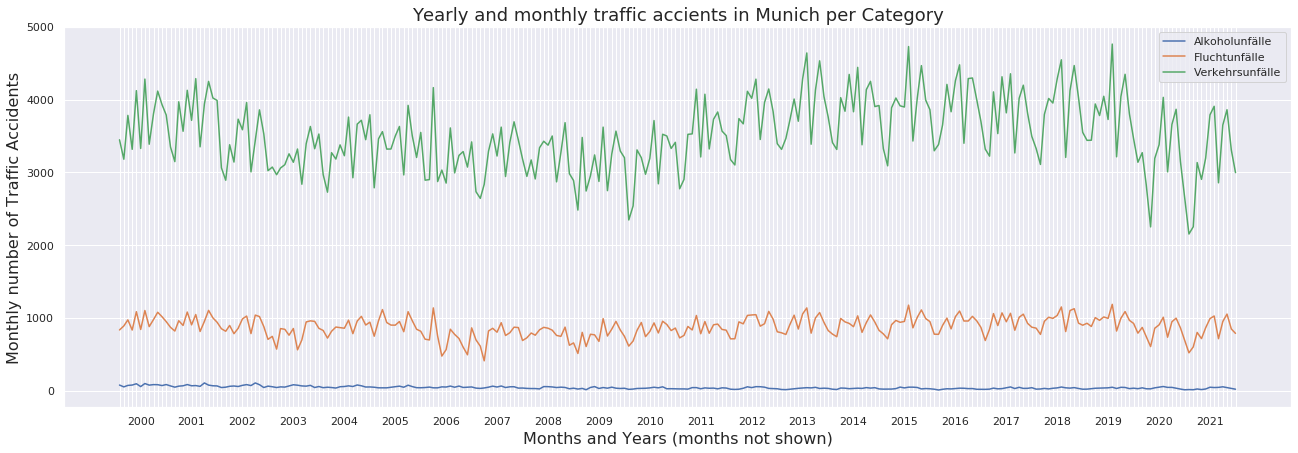

In [48]:
plt.figure(figsize=(22,7))
plt.title('Yearly and monthly traffic accients in Munich per Category', fontsize=18)
filtering_condition = (df.MONAT!='Summe')&(df.AUSPRAEGUNG=='insgesamt')
for category in ['Alkoholunfälle','Fluchtunfälle','Verkehrsunfälle']:
    plt.plot('MONAT_DATETIME','WERT',data=df[filtering_condition & (df['MONATSZAHL']==category)].sort_values(by='MONAT_DATETIME'), label=category)
dates = df[filtering_condition & (df['MONATSZAHL']==category)].sort_values(by='MONAT_DATETIME')['MONAT'].to_list()
xticks_labels = [d[:4] if d.endswith('06') else '' for d in dates]
plt.xticks(df[filtering_condition & (df['MONATSZAHL']==category)].sort_values(by='MONAT_DATETIME')['MONAT_DATETIME'], xticks_labels)
plt.xlabel('Months and Years (months not shown)', fontsize=16)
plt.ylabel('Monthly number of Traffic Accidents', fontsize=16)
plt.legend(loc='best')
plt.show()

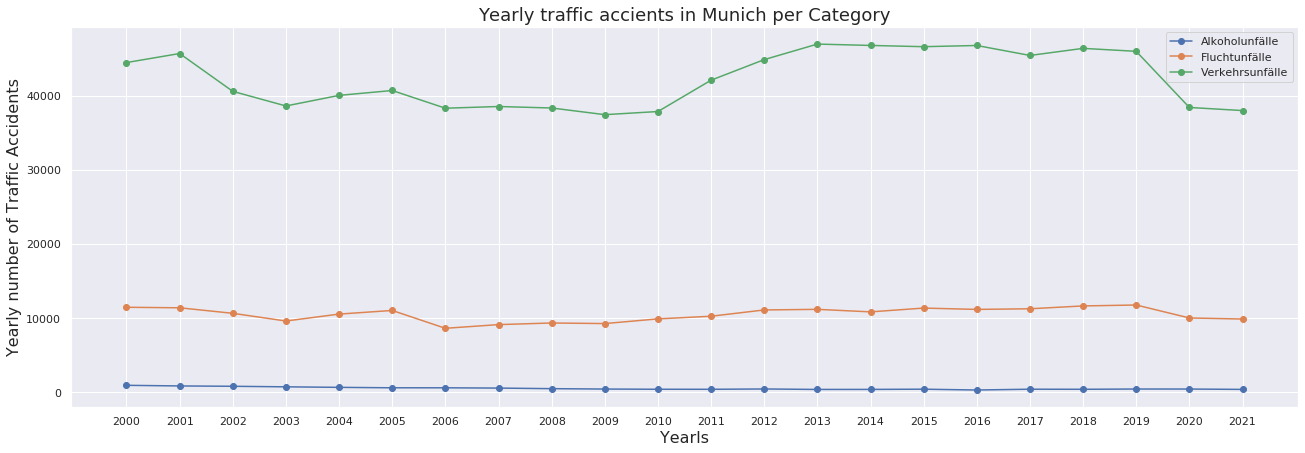

In [52]:
plt.figure(figsize=(22,7))
plt.title('Yearly traffic accients in Munich per Category', fontsize=18)
filtering_condition = (df.MONAT=='Summe')&(df.AUSPRAEGUNG=='insgesamt')
for category in ['Alkoholunfälle','Fluchtunfälle','Verkehrsunfälle']:
    plt.plot('JAHR','WERT',data=df[filtering_condition & (df['MONATSZAHL']==category)].sort_values(by='JAHR'), label=category, marker='o')
plt.xticks(df[filtering_condition & (df['MONATSZAHL']==category)].sort_values(by='JAHR')['JAHR'], label='Years')
plt.xlabel('Yearls', fontsize=16)
plt.ylabel('Yearly number of Traffic Accidents', fontsize=16)
plt.legend(loc='best')
plt.show()

## Visualize the dataset as a heatmap
The dataset contains monthly values for each traffic accident category. It is way more user-friendly to visualize such data as a heatmap (same as temperature change per month). Seaborn has a decent built-in heatmap function for this task:

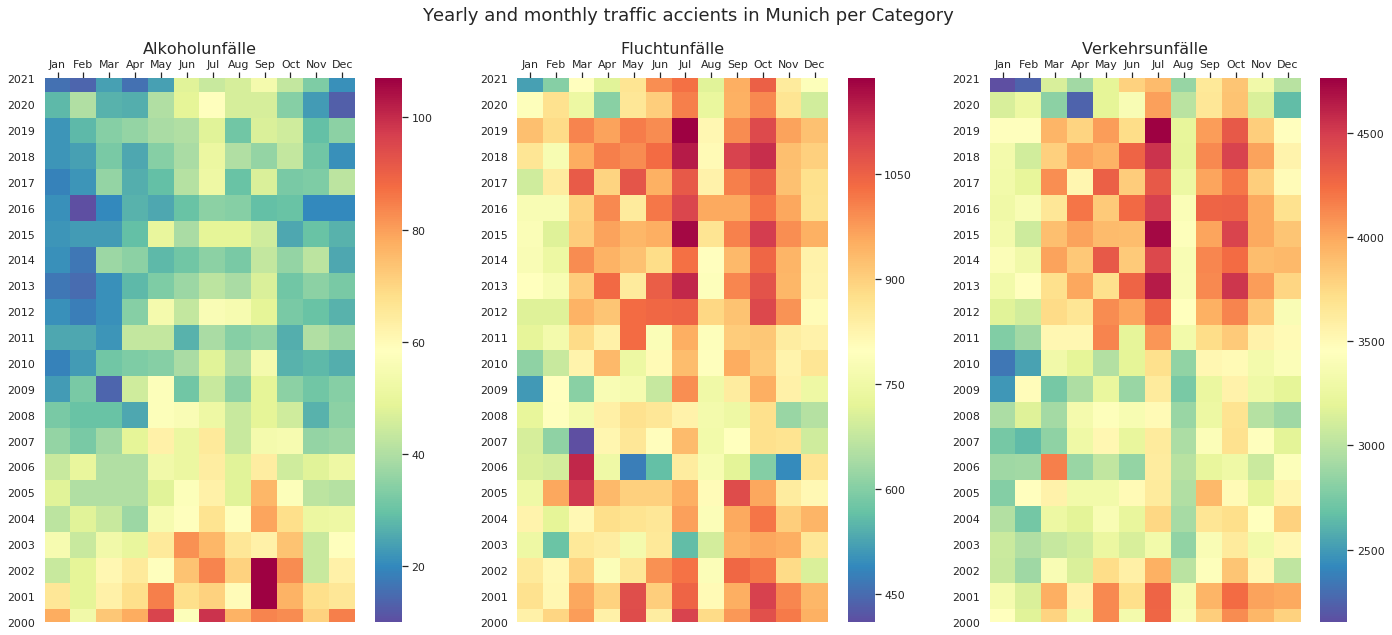

In [13]:
# Define a Figure variable and plot each category to each Axes
fig, axs = plt.subplots(1, 3, figsize=(24,10))
fig.suptitle('Yearly and monthly traffic accients in Munich per Category', fontsize=18)
# plot three categories in a subplot Axes loop
for idx, category in enumerate(df.MONATSZAHL.unique()):
    data_for_heatmap = df[(df['MONATSZAHL']==category)&(df.AUSPRAEGUNG=='insgesamt')&(df.MONAT!='Summe')].sort_values(by='MONAT_DATETIME')[['JAHR','WERT','MONAT_DATETIME']]
    matrix = data_for_heatmap['WERT'].values.reshape(len(data_for_heatmap.JAHR.unique()),-1)
    month_names=data_for_heatmap['MONAT_DATETIME'].dt.month_name().str[:3].unique().tolist()
    years=data_for_heatmap['MONAT_DATETIME'].dt.year.unique().tolist()
    sns.heatmap(ax=axs[idx], data=matrix, cmap='Spectral_r', square=True, xticklabels=month_names, yticklabels=years)
    axs[idx].xaxis.tick_top()
    axs[idx].invert_yaxis()
    axs[idx].set_title(category, fontsize=16)